In [17]:
from sklearn.metrics import DistanceMetric
from math import radians
import pandas as pd
import numpy as np

cities_df_original = pd.DataFrame({
    'city':['Bangalore','Mumbai','Delhi','Kolkatta','Chennai','Bhopal'],
    'lat':[12.9716,19.076,28.7041,22.5726,13.0827,23.2599],
    'lon':[77.5946,72.877,77.1025,88.639,80.2707,77.4126],})


In [18]:
cities_df_original

,city,lat,lon
0,Bangalore,12.9716,77.5946
1,Mumbai,19.0760,72.8770
2,Delhi,28.7041,77.1025
3,Kolkatta,22.5726,88.6390
4,Chennai,13.0827,80.2707
5,Bhopal,23.2599,77.4126


In [19]:
requested_distances = pd.DataFrame({'from_city':['Bangalore','Mumbai','Delhi'],
                                    'to_city':['Kolkatta','Chennai','Bhopal']})

In [20]:
requested_distances

,from_city,to_city
0,Bangalore,Kolkatta
1,Mumbai,Chennai
2,Delhi,Bhopal


In [21]:
cities_df = cities_df_original.copy()
cities_df['lat'] = np.radians(cities_df_original['lat'])
cities_df['lon'] = np.radians(cities_df_original['lon'])

In [22]:
dist = DistanceMetric.get_metric('haversine')

In [23]:
dist_array = dist.pairwise(cities_df [['lat','lon']].to_numpy())*6373

In [24]:
distance_df = pd.DataFrame(dist_array,  columns=cities_df.city.unique(), index=cities_df.city.unique())


In [25]:
distance_df

,Bangalore,Mumbai,Delhi,Kolkatta,Chennai,Bhopal
Bangalore,0.000000,845.628325,1750.664163,1582.525176,290.263116,1144.527052
Mumbai,845.628325,0.000000,1153.629733,1683.203283,1033.479952,661.621084
Delhi,1750.664163,1153.629733,0.000000,1341.809060,1768.206317,606.349722
Kolkatta,1582.525176,1683.203283,1341.809060,0.000000,1377.283504,1152.404181
Chennai,290.263116,1033.479952,1768.206317,1377.283504,0.000000,1171.476936
Bhopal,1144.527052,661.621084,606.349722,1152.404181,1171.476936,0.000000


In [26]:
dist_AB = []
for couple_city in zip(requested_distances["from_city"],requested_distances["to_city"]):
        dist_AB.append(distance_df.loc[couple_city[0],couple_city[1]])

In [27]:
requested_distances["Km"] = dist_AB

In [28]:
requested_distances


,from_city,to_city,Km
0,Bangalore,Kolkatta,1582.525176
1,Mumbai,Chennai,1033.479952
2,Delhi,Bhopal,606.349722


In [29]:
import matplotlib.pyplot as plt

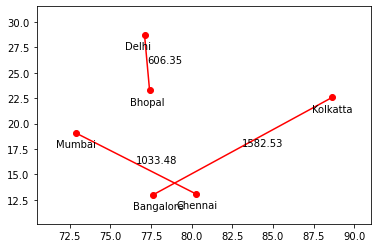

In [31]:
fig, ax = plt.subplots()



x_pixel = cities_df_original["lon"]
y_pixel = cities_df_original["lat"]

x_line = requested_distances["from_city"]
y_line = requested_distances["to_city"]
xy_dist = requested_distances["Km"]

stdx = np.std(x_pixel)/2
stdy = np.std(y_pixel)/2

maxX = max(x_pixel+stdx)
maxY = max(y_pixel+stdy)
minX = min(x_pixel-stdx)
minY = min(y_pixel-stdy)

for i, txt in enumerate(cities_df["city"].tolist()):
    ax.annotate(txt, (x_pixel[i]-stdx/2, y_pixel[i]-stdy/2))
    
cities = cities_df_original['city']
for i in range(len(x_line)):
    
    lats_longs_mini_df = cities_df_original.loc[(cities==x_line[i]) | (cities==y_line[i])]
    lats = lats_longs_mini_df["lat"].tolist()
    longs = lats_longs_mini_df["lon"].tolist()
    plt.plot(longs, lats, 'ro-')

    mid_point_x = (longs[0] + longs[1])/2
    mid_point_y = (lats[0] + lats[1])/2
    
    ax.annotate(xy_dist[i].round(2), (mid_point_x,mid_point_y))

plt.xlim([minX,maxX])
plt.ylim([minY,maxY])
plt.show()